# Lab Assignment 8:

# Write a python program for Multivariate Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [32]:
# loading our csv file using numpy and printing
data = np.loadtxt('car_sales.csv',delimiter=',',skiprows=1)
print(data)

[[  12.9   15.9   18.8 ...  102.    68.  2705. ]
 [  29.2   33.9   38.7 ...  115.    71.  3560. ]
 [  25.9   29.1   32.3 ...  102.    67.  3375. ]
 ...
 [  22.9   23.3   23.7 ...   97.    66.  2810. ]
 [  21.8   22.7   23.5 ...  104.    67.  2985. ]
 [  24.8   26.7   28.5 ...  105.    69.  3245. ]]


In [33]:
newData = data.T
print(newData)

[[  12.9   29.2   25.9 ...   22.9   21.8   24.8]
 [  15.9   33.9   29.1 ...   23.3   22.7   26.7]
 [  18.8   38.7   32.3 ...   23.7   23.5   28.5]
 ...
 [ 102.   115.   102.  ...   97.   104.   105. ]
 [  68.    71.    67.  ...   66.    67.    69. ]
 [2705.  3560.  3375.  ... 2810.  2985.  3245. ]]


In [34]:
#our Y matrix or dependent parameters 
y0 = newData[5]
y1 = newData[6]
y2 = newData[7]


n = len(y0)
Y0 = np.array(y0).reshape(n,1)
Y1 = np.array(y1).reshape(n,1)
Y2 = np.array(y2).reshape(n,1)

Y = np.hstack((Y0, Y1, Y2))
print('----------------Y Matrix-----------------')
print(Y)

----------------Y Matrix-----------------
[[ 140.  6300.    13.2]
 [ 200.  5500.    18. ]
 [ 172.  5500.    16.9]
 [ 172.  5500.    21.1]
 [ 208.  5700.    21.1]
 [ 110.  5200.    16.4]
 [ 170.  4800.    18. ]
 [ 180.  4000.    23. ]
 [ 170.  4800.    18.8]
 [ 200.  4100.    18. ]
 [ 295.  6000.    20. ]
 [ 110.  5200.    15.2]
 [ 110.  5200.    15.6]
 [ 160.  4600.    15.5]
 [ 110.  5200.    16.5]
 [ 170.  4800.    20. ]
 [ 165.  4000.    27. ]
 [ 170.  4200.    23. ]
 [ 300.  5000.    20. ]
 [ 153.  5300.    18. ]
 [ 141.  5000.    16. ]
 [ 147.  4800.    16. ]
 [  92.  6000.    13.2]
 [  93.  4800.    14. ]
 [ 100.  4800.    16. ]
 [ 142.  5000.    20. ]
 [ 100.  4800.    16. ]
 [ 300.  6000.    19.8]
 [  92.  6000.    13.2]
 [ 214.  5800.    18. ]
 [  63.  5000.    10. ]
 [ 127.  6500.    13.2]
 [  96.  4200.    15.9]
 [ 105.  4600.    15.4]
 [ 115.  5500.    15.5]
 [ 145.  4800.    21. ]
 [ 140.  4800.    16. ]
 [ 190.  4200.    20. ]
 [  55.  5700.    10.6]
 [  90.  5400.    12.4

In [35]:
#our Y matrix or dependent parameters 
# code to load vectors 
x0 = newData[1]
x1 = newData[3]
x2 = newData[4]

n = len(x0)
#ones vector
x = np.ones([n, 1])

#transforming vector into matrices

x0 = np.array(x0).reshape(n, 1)
x1 = np.array(x1).reshape(n, 1)
x2 = np.array(x2).reshape(n, 1)

# for normalising vector on 0 mean and unit stand. deviation

x0_norm = np.array([])
x1_norm = np.array([])
x2_norm = np.array([])

xtemp0 = 0
xtemp1 = 0
xtemp2 = 0

for i in range(Y.shape[0]):
    xtemp0 = (x0[i]-np.mean(x0))/np.std(x0)
    xtemp1 = (x1[i]-np.mean(x1))/np.std(x1)
    xtemp2 = (x2[i]-np.mean(x2))/np.std(x2)
    x0_norm = np.append(x0_norm, xtemp0)
    x1_norm = np.append(x1_norm, xtemp1)
    x2_norm = np.append(x2_norm, xtemp2)
    xtemp0 = 0
    xtemp1 = 0
    xtemp2 = 0


x0 = x0_norm.reshape(n, 1)
x1 = x1_norm.reshape(n, 1)
x2 = x2_norm.reshape(n, 1)

X = np.hstack(( x, x0, x1, x2))
print('------------------------X Matrix---------------------------- \n')
print(X)

------------------------X Matrix---------------------------- 

[[ 1.00000000e+00 -3.75720139e-01 -7.39308746e-01 -8.41022061e-01]
 [ 1.00000000e+00  1.49784409e+00  8.05763465e-01  5.15868550e-01]
 [ 1.00000000e+00  9.98226964e-01  8.05763465e-01  1.28185519e-01]
 [ 1.00000000e+00  1.89337432e+00  8.05763465e-01  1.28185519e-01]
 [ 1.00000000e+00  1.09190518e+00 -7.39308746e-01  8.06630824e-01]
 [ 1.00000000e+00 -3.96537519e-01 -7.39308746e-01 -4.53339029e-01]
 [ 1.00000000e+00  1.34305680e-01  8.05763465e-01  1.09739310e+00]
 [ 1.00000000e+00  4.36157694e-01  8.05763465e-01  2.93888750e+00]
 [ 1.00000000e+00  7.06783639e-01  8.05763465e-01  1.09739310e+00]
 [ 1.00000000e+00  1.58111361e+00  2.35083568e+00  2.16352143e+00]
 [ 1.00000000e+00  2.14318288e+00  2.35083568e+00  1.87275916e+00]
 [ 1.00000000e+00 -6.35937393e-01 -7.39308746e-01 -4.53339029e-01]
 [ 1.00000000e+00 -8.44111196e-01 -7.39308746e-01 -4.53339029e-01]
 [ 1.00000000e+00 -4.58989660e-01  8.05763465e-01  7.09710066e-01]

In [36]:
#taking transpose to calulate correlation
X_transpose = X.T

#correlation matrix ot X.T*X
X_transpose_X = X_transpose.dot(X)
print(X_transpose_X)

[[ 9.30000000e+01 -1.62092562e-14  1.70904957e-14 -6.17284002e-14]
 [-1.62092562e-14  9.30000000e+01  5.96840750e+01  5.55605614e+01]
 [ 1.70904957e-14  5.96840750e+01  9.30000000e+01  8.27897742e+01]
 [-6.17284002e-14  5.55605614e+01  8.27897742e+01  9.30000000e+01]]


In [37]:
#correlation matrix to detect multicollinearity
n = X.shape[0]
correlation_matrix = X_transpose_X/n
print(correlation_matrix)

[[ 1.00000000e+00 -1.74293077e-16  1.83768771e-16 -6.63746238e-16]
 [-1.74293077e-16  1.00000000e+00  6.41764247e-01  5.97425392e-01]
 [ 1.83768771e-16  6.41764247e-01  1.00000000e+00  8.90212626e-01]
 [-6.63746238e-16  5.97425392e-01  8.90212626e-01  1.00000000e+00]]


In [38]:
# inverse of ((X.T)X)
inverse_XTX = np.linalg.inv(X_transpose_X)
print()
print('-------------Inverse of X Transpose*X matrix------------')
print()
print(inverse_XTX)


-------------Inverse of X Transpose*X matrix------------

[[ 1.07526882e-02  3.45828064e-18 -4.19699682e-17  4.24331873e-17]
 [ 3.45828064e-18  1.83853359e-02 -9.73911039e-03 -2.31398746e-03]
 [-4.19699682e-17 -9.73911039e-03  5.69738376e-02 -4.49004377e-02]
 [ 4.24331873e-17 -2.31398746e-03 -4.49004377e-02  5.21060596e-02]]


In [39]:
# calculating (X.T)Y
X_transpose_Y = (X_transpose).dot(Y)
print()
print('-------------X-transpose*Y matrix------------')
print()
print(X_transpose_Y)


-------------X-transpose*Y matrix------------

[[ 1.33760000e+04  4.91100000e+05  1.54980000e+03]
 [ 3.81856901e+03 -2.73496728e+02  1.87911408e+02]
 [ 3.65897189e+03 -2.22315955e+04  2.08784113e+02]
 [ 3.54679950e+03 -3.02422466e+04  2.30325928e+02]]


In [40]:
# calculating for beta
betas = inverse_XTX.dot(X_transpose_Y)
print("our beta matrix is : \n", betas)

our beta matrix is : 
 [[ 1.43827957e+02  5.28064516e+03  1.66645161e+01]
 [ 2.63632931e+01  2.81467813e+02  8.88471517e-01]
 [ 1.20233551e+01  9.39344159e+01 -2.76592814e-01]
 [ 1.16841859e+01 -5.76963069e+02  2.19205386e+00]]


In [42]:
beta_00 = betas[0, 0]
beta_01 = betas[0, 1]
beta_02 = betas[0, 2]
beta_10 = betas[1, 0]
beta_11 = betas[1, 1]
beta_12 = betas[1, 2]
beta_20 = betas[2, 0]
beta_21 = betas[2, 1]
beta_22 = betas[2, 2]
beta_30 = betas[3, 0]
beta_31 = betas[3, 1]
beta_32 = betas[3, 2]
print('-------------Value of intercept, beta1, beta2 ------------')
print()
print("beta00 = ", beta_00, "\nbeta01 = ", beta_01, "\nbeta02 = ", beta_02)
print("beta10 = ", beta_10, "\nbeta11 = ", beta_11, "\nbeta12 = ", beta_12)
print("beta20 = ", beta_20, "\nbeta21 = ", beta_21, "\nbeta22 = ", beta_22)
print("beta30 = ", beta_30, "\nbeta31 = ", beta_31, "\nbeta32 = ", beta_32)

-------------Value of intercept, beta1, beta2 ------------

beta00 =  143.82795698924735 
beta01 =  5280.645161290323 
beta02 =  16.66451612903226
beta10 =  26.363293069369703 
beta11 =  281.4678125731873 
beta12 =  0.8884715165348473
beta20 =  12.023355093447577 
beta21 =  93.93441587918619 
beta22 =  -0.27659281443277806
beta30 =  11.684185869251337 
beta31 =  -576.9630686919553 
beta32 =  2.1920538558157556


In [43]:
# so, our equation is like
print('Y = ',betas,'X') 

Y =  [[ 1.43827957e+02  5.28064516e+03  1.66645161e+01]
 [ 2.63632931e+01  2.81467813e+02  8.88471517e-01]
 [ 1.20233551e+01  9.39344159e+01 -2.76592814e-01]
 [ 1.16841859e+01 -5.76963069e+02  2.19205386e+00]] X


In [44]:
# findind Y-pred
# y_predicted = Hat_matrix *Y
# Hat-matrix = X(X.T*X)^-1 * X.T
hat_matrix = X.dot(inverse_XTX).dot(X_transpose)
print(hat_matrix)

[[ 0.01863539  0.00850819  0.01117263 ...  0.00982118  0.01549124
   0.01493692]
 [ 0.00850819  0.03844612  0.03415345 ...  0.0229866   0.01541427
   0.02817995]
 [ 0.01117263  0.03415345  0.04138512 ...  0.03522209  0.00298311
   0.02765873]
 ...
 [ 0.00982118  0.0229866   0.03522209 ...  0.03575975 -0.00554734
   0.01918466]
 [ 0.01549124  0.01541427  0.00298311 ... -0.00554734  0.03220681
   0.01675727]
 [ 0.01493692  0.02817995  0.02765873 ...  0.01918466  0.01675727
   0.02581127]]


In [45]:
# y_predicted = Hat_matrix *Y
Y_pred = hat_matrix.dot(Y)
print(Y_pred)

[[ 115.20710721 5590.68416939   14.69162132]
 [ 199.03154403 5480.29188      18.9032512 ]
 [ 181.33023066 5563.34453144   17.60953353]
 [ 204.92926271 5815.29969922   18.40484646]
 [ 173.15002602 5053.1385918    19.60730847]
 [ 119.18805311 5361.14595528   15.52294776]
 [ 169.87882216 4760.98151842   18.96651929]
 [ 199.35299814 3783.46888466   23.2713611 ]
 [ 184.97122638 4922.11563735   19.47514965]
 [ 239.05523721 4698.23016134   22.16162179]
 [ 250.47591363 5024.19366272   22.02363776]
 [ 112.87668407 5293.76259645   15.31024779]
 [ 107.38853709 5235.16837139   15.12529129]
 [ 149.70784265 4817.66676858   17.58957119]
 [ 119.73686781 5367.00537779   15.54144341]
 [ 157.53049144 4629.14451202   18.55036717]
 [ 164.01591424 4358.33515628   19.64038825]
 [ 196.55690881 4176.48637417   20.90367317]
 [ 257.17020094 4347.5530495    24.16644417]
 [ 157.63084503 4970.26693784   17.68229389]
 [ 128.52198166 4916.71808333   17.23183975]
 [ 188.09006081 5295.46488695   18.70880243]
 [  93.424

<IPython.core.display.Javascript object>


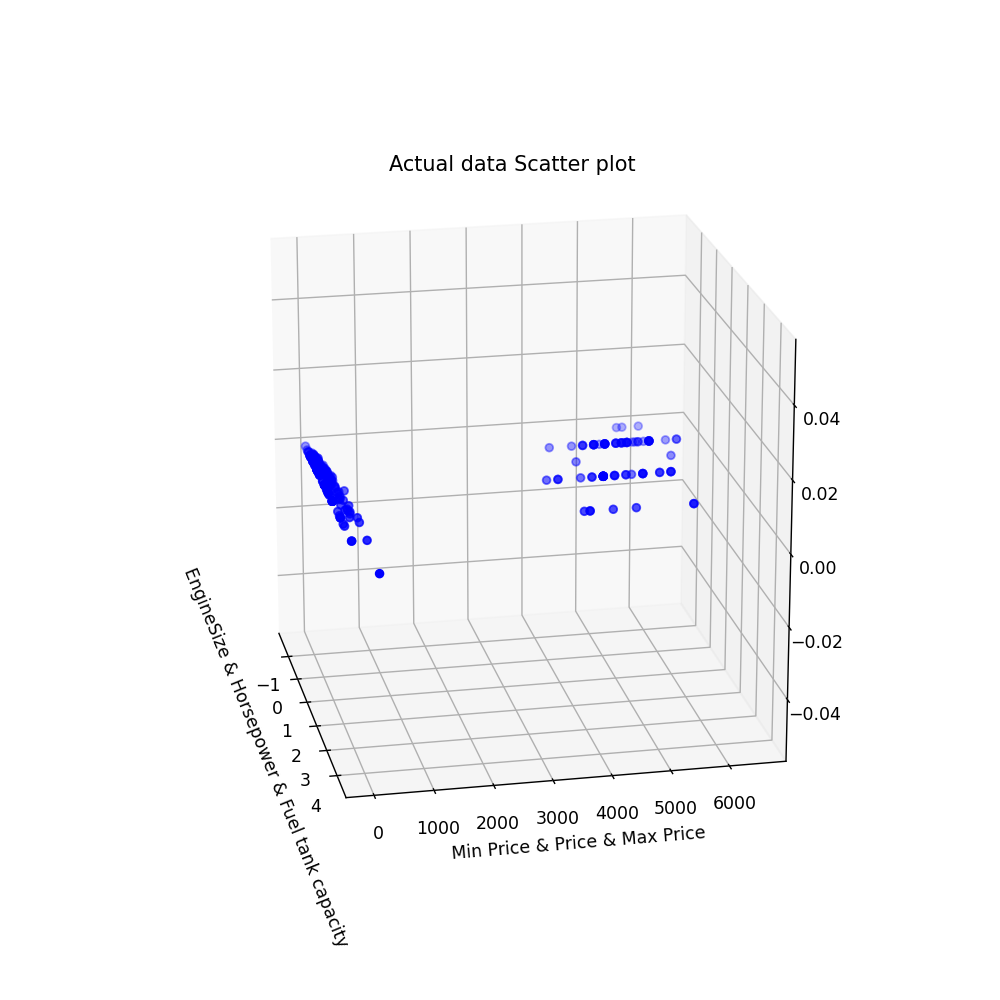

In [47]:
# to plot scatter plot transforming our original X matrix to X_plot
X_plot = np.hstack((x0, x1, x2))

# our scatter plot in 3d
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
   
ax.scatter(X_plot, Y, color='blue')
ax.set_xlabel('EngineSize & Horsepower & Fuel tank capacity')
ax.set_ylabel('Min Price & Price & Max Price')
plt.title('Actual data Scatter plot')
ax.view_init(45, 0)
plt.show()

<IPython.core.display.Javascript object>


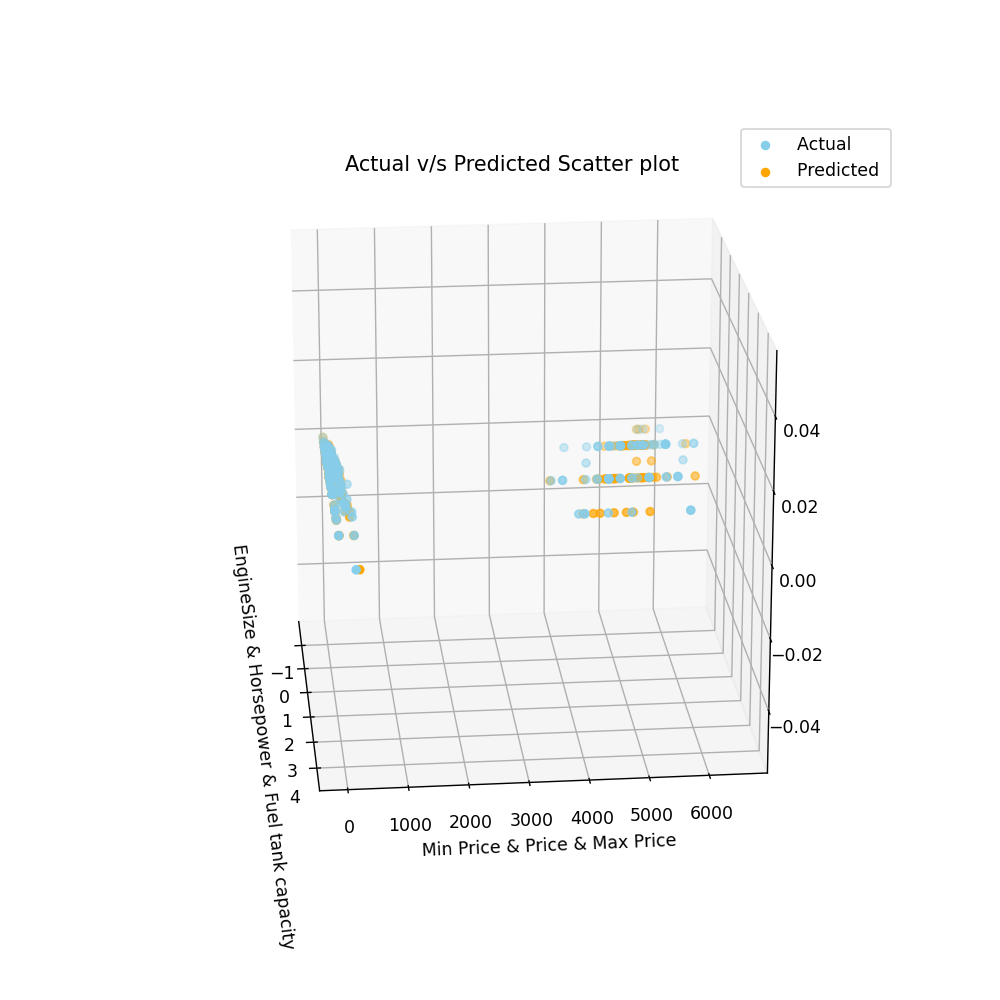

In [48]:
# to plot scatter plot transforming our original X matrix to X_plot
X_plot = np.hstack((x0, x1,x2))
# our scatter plot in 3d
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
   
ax.scatter(X_plot, Y, color='skyblue',label ='Actual ' )
ax.scatter(X_plot, Y_pred, c ='orange',label ='Predicted ')
ax.set_xlabel('EngineSize & Horsepower & Fuel tank capacity')
ax.set_ylabel('Min Price & Price & Max Price')
plt.title('Actual v/s Predicted Scatter plot')
ax.legend()
ax.view_init(45, 0)
plt.show()

In [49]:
# np.max(z)/7400

In [50]:
# %matplotlib notebook
# xs = np.tile(np.arange(2),(2,1))
# ys = np.tile(np.arange(2),(2,1)).T
# z = (xs*(beta_01 + beta_11+ beta_21)) + (ys*(beta_02 + beta_12 + beta_22))+ (beta_00 + beta_10 + beta_20 )

# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X_plot, Y, color='skyblue',label ='Actual cement', alpha = 0.1 )
# ax.scatter(X_plot, Y_pred, c ='orange',label ='Predicted cement',alpha =0.1)
# ax.plot_surface(xs, ys, z,alpha = 1)
# ax.set_xlabel('EngineSize & Horsepower & Fuel tank capacity')
# ax.set_ylabel('Min Price & Price & Max Price')
# plt.title('Fitted plot plane ')
# ax.legend()
# ax.view_init(45, 0)
# plt.show()

In [51]:
# calculting R-square value
numerator = 0.0
denomenator = 0.0

Y_mean = np.mean(Y)

for i in range(Y.shape[0]):
    numerator = numerator + ((Y_pred[i] - Y_mean)**2)
    denomenator = denomenator + ((Y[i] - Y_mean)**2)

R_square = (numerator/denomenator)
print('R-square value is : ', R_square)  

R-square value is :  [0.99974475 0.98481051 0.99999875]


In [52]:
#anova attributes
# J matrix of one for computation of ss-regression , ss-residual, ss-total
n = X.shape[0]
J = np.ones([n, n])
value = J/n

In [53]:
#ss-regression = Y.T*(H-(1/n)J)Y
Y_transpose = Y.T
ss_regression = Y_transpose.dot(hat_matrix - value).dot(Y)
print(ss_regression)

[[ 1.86104637e+05 -6.27864672e+05  1.01554200e+04]
 [-6.27864672e+05  1.52833670e+07 -6.03865278e+04]
 [ 1.01554200e+04 -6.03865278e+04  6.14092587e+02]]


In [54]:
# ss-residual = Y.T(I - H)Y
i_matrix = np.identity(X.shape[0])
ss_residual = Y_transpose.dot(i_matrix - hat_matrix).dot(Y)
print(ss_residual)

[[6.62586104e+04 7.33354994e+05 1.09191227e+03]
 [7.33354994e+05 1.74767943e+07 3.72656832e+02]
 [1.09191227e+03 3.72656832e+02 3.75300316e+02]]


In [55]:
# ss-total = Y.T(I-(1/n)J)Y
ss_total = Y_transpose.dot(i_matrix - value).dot(Y)
print(ss_total)

[[ 2.52363247e+05  1.05490323e+05  1.12473323e+04]
 [ 1.05490323e+05  3.27601613e+07 -6.00138710e+04]
 [ 1.12473323e+04 -6.00138710e+04  9.89392903e+02]]


In [56]:
n = Y.shape[0]
m = Y.shape[1]
k = X.shape[1]
ms_regression = (ss_regression/m*(n-1))
ms_residual = (ss_residual/m*(n-k))
print("MS Regression :\n\n", ms_regression, "\n\nMS Residual :\n\n", ms_residual)

MS Regression :

 [[ 5.70720886e+06 -1.92545166e+07  3.11432880e+05]
 [-1.92545166e+07  4.68689920e+08 -1.85185352e+06]
 [ 3.11432880e+05 -1.85185352e+06  1.88321727e+04]] 

MS Residual :

 [[1.96567211e+06 2.17561982e+07 3.23933973e+04]
 [2.17561982e+07 5.18478232e+08 1.10554860e+04]
 [3.23933973e+04 1.10554860e+04 1.11339094e+04]]


In [57]:
F_stats = (ms_regression/ms_residual)
print("F-stats for data : \n", F_stats)
std_Error = (ms_residual**0.5) 
print("\nStandared Error :\n", std_Error)

F-stats for data : 
 [[   2.9034389    -0.88501293    9.61408516]
 [  -0.88501293    0.90397222 -167.50539198]
 [   9.61408516 -167.50539198    1.691425  ]]

Standared Error :
 [[ 1402.02428988  4664.35399199   179.98165811]
 [ 4664.35399199 22770.11708416   105.1450713 ]
 [  179.98165811   105.1450713    105.51734161]]
